<center><b><big> CITS 5508 LAB SHEET 2: CLASSIFICATION ON FOREST TYPE MAPPING DATASET </big></b></center>

**Name: Thanh Duy Tang**<br>
**Student Number: 22803018**<br>
**Date created: 10th March 2020 <br>
**Last modified: 19th March 2020


## 1. Setup

Before going to loading data part, we need to make sure that MatplotLib figures inline and prepare a function to save the figures. Moreover, we should use Python 3.0 as well as Scikit-Learn >= 0.20

In [2]:
#Python >= 3.0 is required
import sys
assert sys.version_info >= (3,5)

#Scikit-Learn >= 0.20 
import sklearn
assert sklearn.__version__ >= '0.20'

#Get the pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#Save the figures
import os
LAB2_ROOT_DIR = "."
CHAPTER_ID = "LAB SHEET 2"
IMAGES_PATH = os.path.join(LAB2_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
#Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2. Loading data
First, we need to dowload the zip file from http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping# and extract two files csv training and testing into the same directory of this lab file.

In [3]:
#Load the Pandas libraries with alias "pd"
import os
import pandas as pd
#Read data from 2 files "traning.csv" and "testing.csv"
train_set = pd.read_csv("training.csv")
test_origin_set = pd.read_csv("testing.csv")

In [4]:
#Take a look at some lines of training dataset
train_set.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [5]:
#Get an overview of training dataset
train_set.info()
train_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


There are 28 attributes which can be easily seen in the table above and the list below: class, b1, b2, b3, b4, b5, b6, b7, b8, b9, ...,	pred_minus_obs_S_b9. There are 325 instances in the training set and 198 instances in test set which mean that the data size is relatively small comapred to the Machine Learning standards, but we can give it a try with small data size and then move to the bigger one. Both training and testing set have the same format. There are not any missing values in both dataset. All attributes are numerical, except "class".

Saving figure attribute_histogram_plots


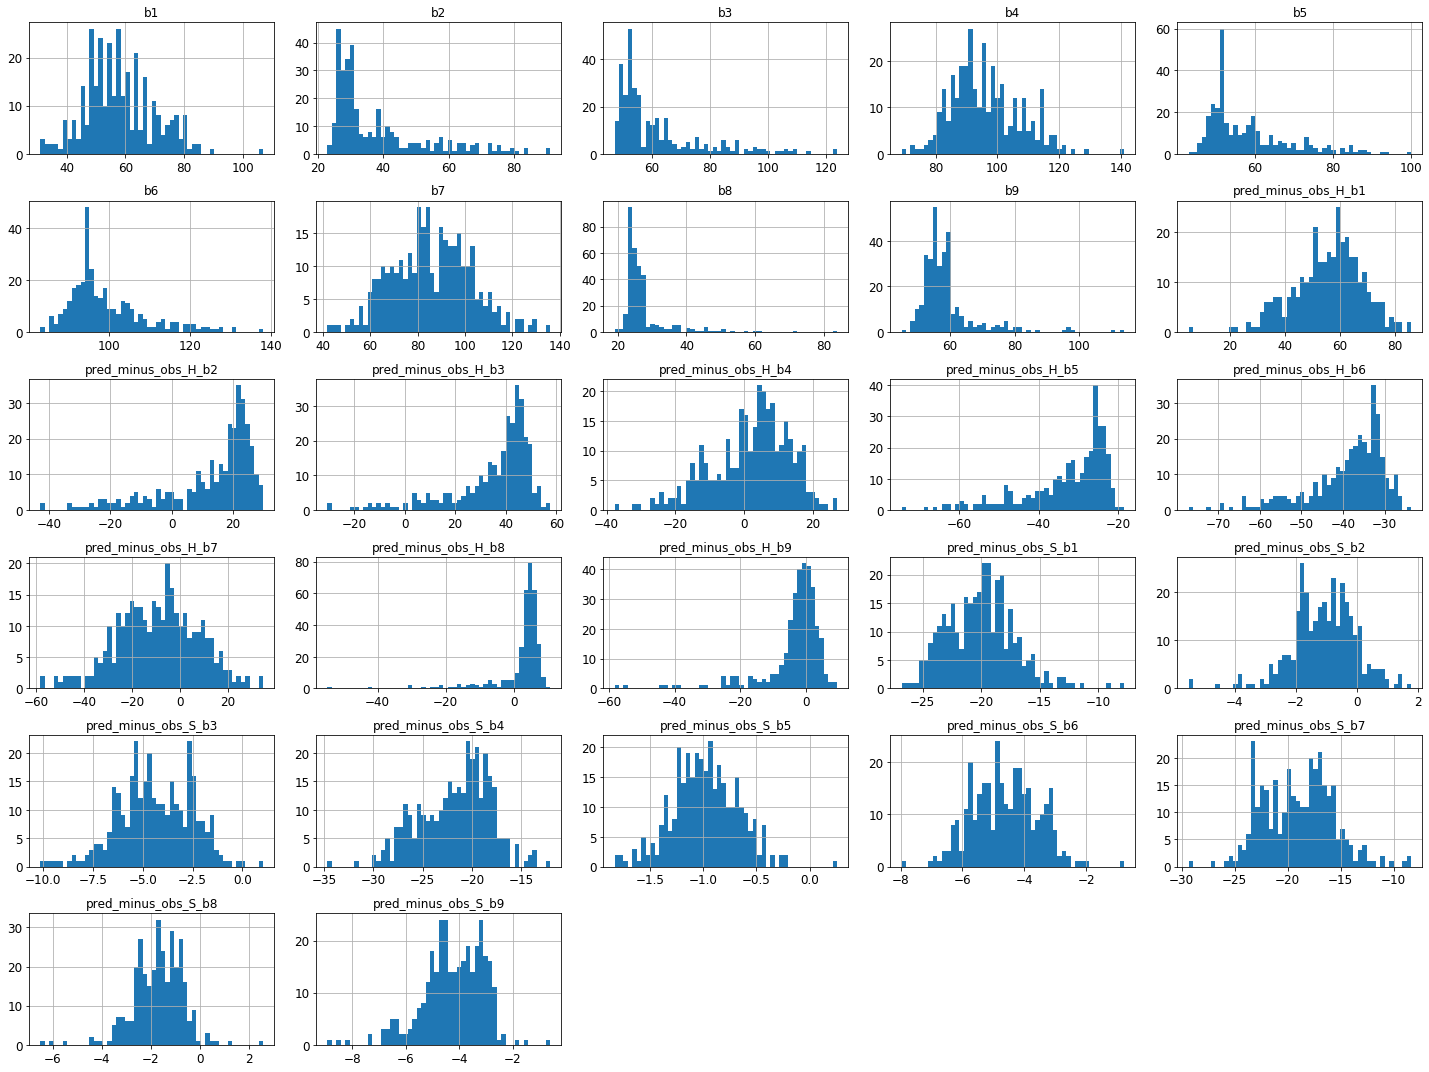

In [6]:
##Visualize the training dataset
import matplotlib.pyplot as plt
train_set.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

As we can notice few things in these histograms:
1. Most of attributes have the same scales. We may not focus on those columns which are behind the column "b9"
2. Most of instances of "b4", "b6", "b7" ranged from 80 to 120. 
3. Other instances of other column ranged from 20 to 60.
=> These histograms are easy for Machine Learning algorithms to detect patterns

## 3. Cleaning data

In [7]:
#Split training set into training set and test set. Original test set is kept for cross validation.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_set, test_size = 0.2, random_state = 1)

In [8]:
#Drop all columns with the names begin with "pred_minus_obs".
import pandas as pd
train_set.drop(train_set.iloc[:, 10:], inplace = True, axis = 1)
test_set.drop(test_set.iloc[:, 10:], inplace = True, axis = 1)
test_origin_set.drop(test_set.iloc[:, 10:], inplace = True, axis = 1)

In [9]:
#Show a few lines of training dataset after drop out columns as required.
train_set.head()
#At this time, the datas of both set are clean as well.

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9
233,s,40,25,50,85,51,93,56,23,51
263,h,67,29,53,103,51,96,86,25,55
51,d,76,72,89,118,74,119,117,32,69
9,d,57,44,65,107,59,104,98,26,59
112,d,49,41,63,95,70,103,115,32,63


Saving figure class_histogram_plot


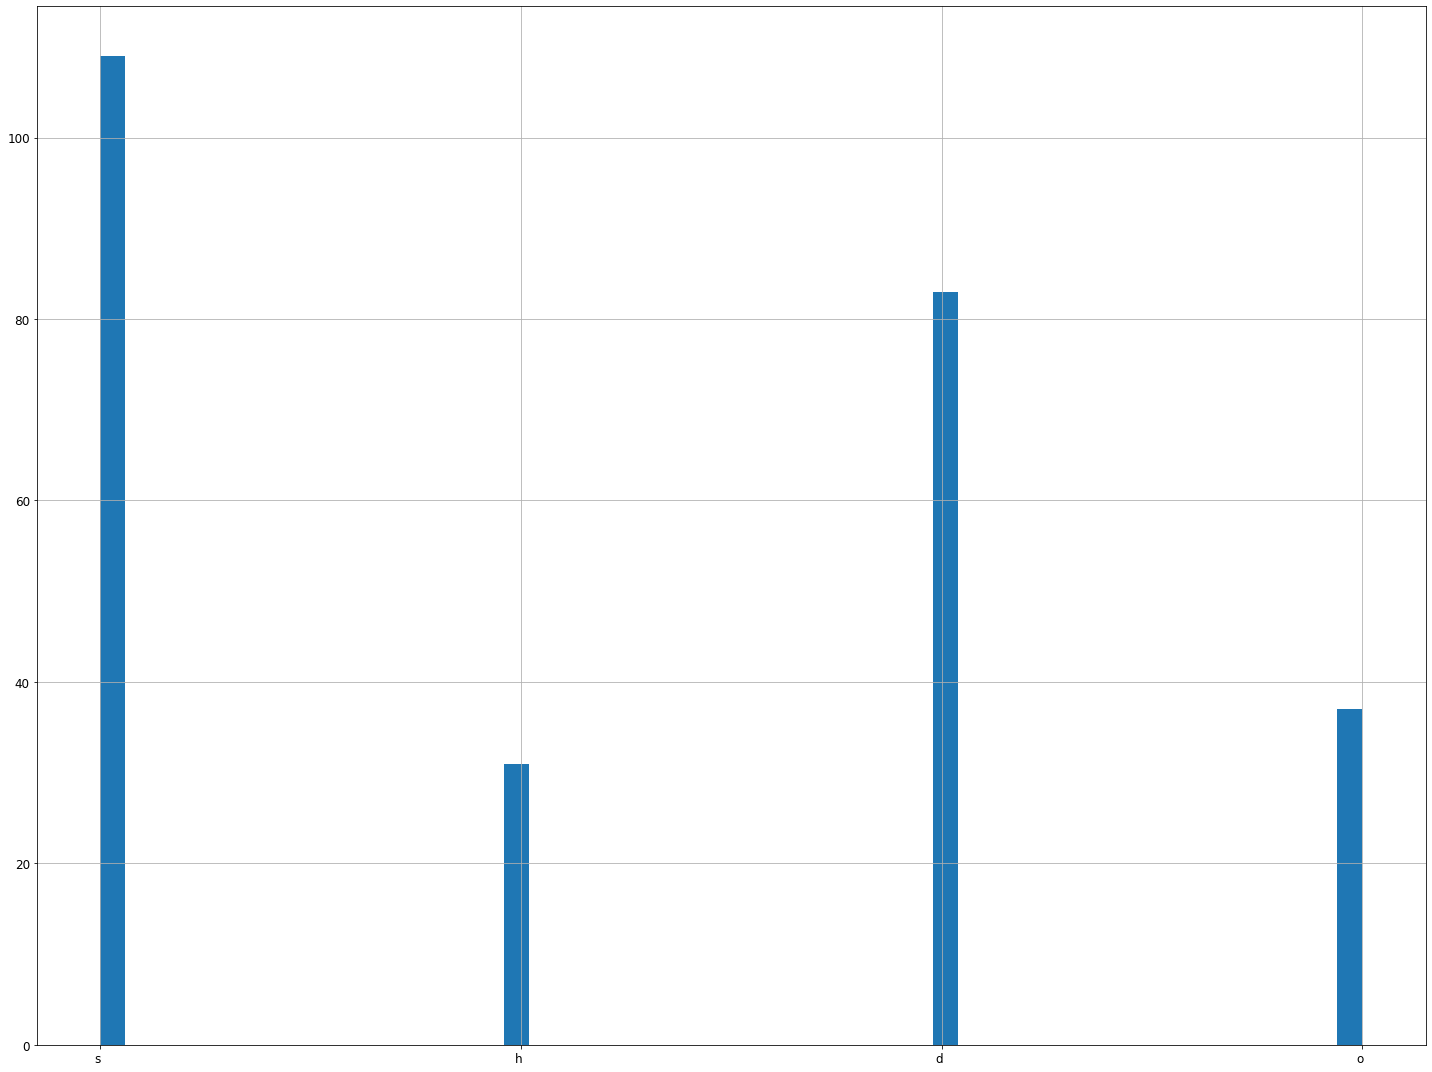

In [10]:
#Count the number of instances for each class label and visualize the graph to easily see the pattern.
train_set['class'].value_counts()
#Visualize
%matplotlib inline
import matplotlib.pyplot as plt
train_set['class'].hist(bins=50, figsize=(20,15))
save_fig("class_histogram_plot")
plt.show()

As we can see, the instances between 4 classes are not fluctuated much. It ranges from round 40 to 140. So, this is a balance dataset

## 4. Normalization

In [11]:
#We need to take all numerical columns
train_set_num = train_set.drop(train_set.iloc[:,0:1], axis = 1)
test_set_num = test_set.drop(test_set.iloc[:,0:1], axis = 1)
test_origin_set_num = test_origin_set.drop(test_origin_set.iloc[:,0:1], axis = 1)

In [12]:
train_set_num.head()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
233,40,25,50,85,51,93,56,23,51
263,67,29,53,103,51,96,86,25,55
51,76,72,89,118,74,119,117,32,69
9,57,44,65,107,59,104,98,26,59
112,49,41,63,95,70,103,115,32,63


In [13]:
#Find the correlation between attributes
corr_matrix = train_set.corr()
corr_matrix["b1"].sort_values(ascending = False)

b1    1.000000
b4    0.682661
b7    0.558149
b9    0.407563
b3    0.273948
b8    0.252714
b2    0.225042
b6    0.154384
b5    0.094396
Name: b1, dtype: float64

Saving figure scatter_matrix_plot


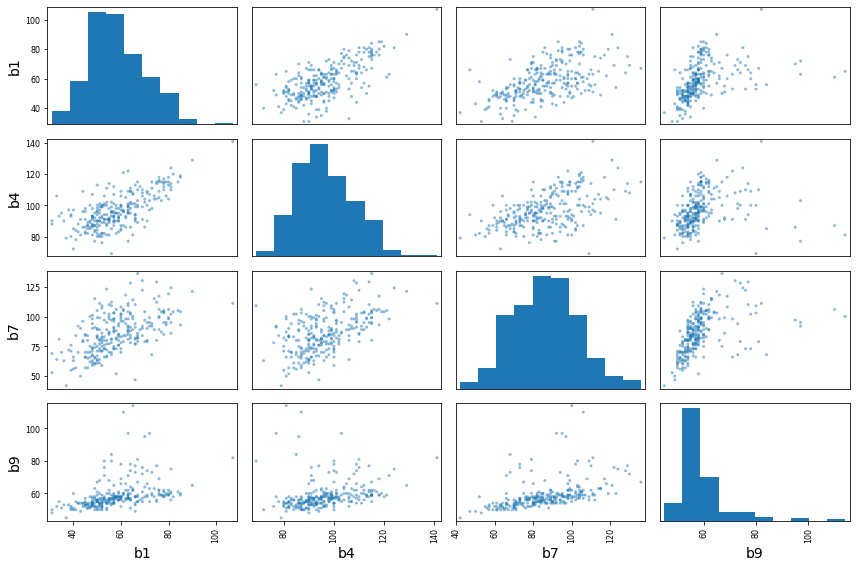

In [14]:
#Plot scatter matrix with pandas
from pandas.plotting import scatter_matrix
attributes = ["b1","b4","b7","b9"]
scatter_matrix(train_set[attributes], figsize = (12,8))
save_fig("scatter_matrix_plot")

As we can see, b4 and b7 are the promising attribute to predict b1.There are upward trends in this scatterplot. This data size is really small, the points somehow are dispeared. However, the correlation of these attributes with b1 are relatively high. To conclude that, we should try to remove some irrelated attributes to prevent algorithms for quick data reproduction.

Saving figure b1_b4_vs_b7_value_scatterplot


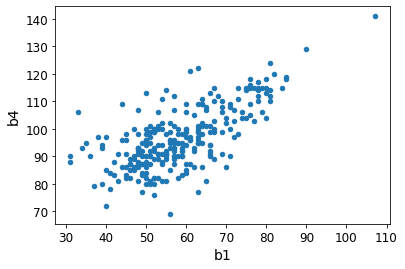

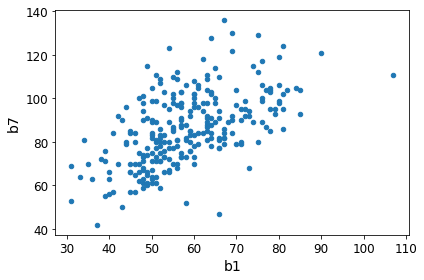

In [15]:
#Zoom in the most correlated attributes on the scatterplot
train_set.plot(kind ="scatter", x ="b1", y="b4")
train_set.plot(kind ="scatter", x="b1", y="b7")
save_fig("b1_b4_vs_b7_value_scatterplot")

In [16]:
#Excute the code of the categorical columns of training and testing set
train_set_cat = train_set["class"]
test_set_cat = test_set["class"]
test_origin_cat = test_origin_set["class"]
train_set_cat

233    s 
263    h 
51     d 
9      d 
112    d 
       ..
203    s 
255    d 
72     o 
235    d 
37     d 
Name: class, Length: 260, dtype: object

In [17]:
#Transform all numerical columns by using StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
train_set_num_tr = num_pipeline.fit_transform(train_set_num)
test_set_num_tr = num_pipeline.fit_transform(test_set_num)
test_origin_num_tr = num_pipeline.fit_transform(test_origin_set_num)

In [18]:
train_set_num_tr

array([[-1.537311  , -0.91765735, -0.77020788, ..., -1.79698563,
        -0.57693744, -0.87842872],
       [ 0.73180658, -0.64821533, -0.57114819, ..., -0.00962425,
        -0.31606138, -0.43473476],
       [ 1.48817911,  2.24828642,  1.8175681 , ...,  1.83731584,
         0.59700482,  1.11819411],
       ...,
       [ 0.73180658,  1.9788444 ,  1.8175681 , ..., -0.42667524,
         3.07532738,  2.44927599],
       [-1.6213524 , -0.44613381, -0.70385465, ..., -0.60541138,
        -0.57693744, -0.87842872],
       [-1.36922822,  0.02538973, -0.10667558, ...,  0.34784802,
        -0.18562335, -0.54565825]])

In [19]:
test_set_num_tr

array([[-0.92622413, -0.33069301, -0.33616701, -0.40924508,  0.58269707,
         0.31351968,  0.27232646,  0.28294352,  0.03349476],
       [-0.36704857, -0.78006678, -0.7471549 ,  0.15473224, -0.46939486,
        -0.29784369, -1.0505405 , -0.65220879, -0.69222512],
       [-0.4602445 ,  0.64295017,  0.34881279, -0.5032413 ,  0.10447346,
        -0.29784369,  0.77627578, -0.18463264, -0.08745855],
       [-0.73983228,  0.41826328,  0.21181683,  2.03465663,  0.00882874,
         0.82298916,  1.0912441 , -0.02877392,  0.03349476],
       [-1.39220377, -0.10600612, -0.13067307, -1.06721862,  0.2957629 ,
         0.41541357, -1.36550882,  1.37395455,  0.3963547 ],
       [ 0.09893106,  0.41826328,  0.41731077, -0.59723752,  0.20011818,
        -0.29784369,  0.39831379, -0.18463264, -0.32936518],
       [-1.29900784,  0.26847202, -0.13067307, -0.12725642, -0.1824607 ,
        -0.1959498 ,  0.52430112, -0.34049136, -0.45031849],
       [ 1.86965367, -0.78006678, -0.61015893,  0.62471334, -0

## 5. Classification

### 5.1 Support Vector Machine

In [20]:
#Assign x_train, y_train, x_test, y_test and apply SVM into this
from sklearn.svm import SVC
x_train, y_train, x_test, y_test = train_set_num_tr, train_set_cat, test_set_num_tr, test_set_cat
svm_clf = SVC(gamma="auto", random_state=1)
svm_clf.fit(x_train, y_train)
svm_y_pred = svm_clf.predict(x_test)

In [21]:
#Draw the confusion matrix of svm_y_pred
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_y_pred)

array([[21,  0,  0,  1],
       [ 0,  4,  0,  3],
       [ 2,  0,  7,  0],
       [ 2,  3,  0, 22]], dtype=int64)

In [22]:
#This code shows the label of the confusion matrix above.
svm_clf.classes_

array(['d ', 'h ', 'o ', 's '], dtype=object)

Here are some comments about the confusion matrix:
- 21 values were correctly classified as "d". 
- 4 values were correctly classified as "h".
- 7 values were correctly classified as "o".
- 22 values were correctly classified as "s".
- Read down to the "h" row, 1 value that should have been "s" were classified as "d".
- For the "h" row, 3 values that should have been "s" were classified as "h"
- 2 values from "o" row were classified as "o", but they must have been "d".
- 5 values were classified as "s", but they must have been respectively "d"(2) and "h"(3).

In [23]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_y_pred)

0.8307692307692308

The accuracy is 83.08%, this ratio is quite good when it can predicted classes correctly. 

## 5.2 Experimenting with some hyperparameters

### Kernel = sigmoid

In [23]:
#Use kernel : sigmoid for classification
svm_clf_sig = SVC(kernel="sigmoid", random_state = 1)
svm_clf_sig.fit(x_train, y_train)
svm_y_pred_sig = svm_clf_sig.predict(x_test)
svm_y_pred_sig

array(['d ', 's ', 'd ', 'd ', 'o ', 'd ', 'd ', 'h ', 's ', 'd ', 'o ',
       's ', 'd ', 's ', 's ', 'h ', 'h ', 's ', 'o ', 's ', 'o ', 's ',
       's ', 's ', 'h ', 's ', 'd ', 'd ', 'd ', 'd ', 's ', 's ', 'd ',
       's ', 'd ', 's ', 's ', 's ', 's ', 'h ', 'd ', 's ', 'd ', 'h ',
       's ', 'o ', 'd ', 'd ', 's ', 's ', 's ', 'd ', 'd ', 'h ', 's ',
       'o ', 's ', 'h ', 'o ', 'h ', 'd ', 'h ', 's ', 'h ', 'd '],
      dtype=object)

In [24]:
#Draw the confusion matrix of svm_y_pred_sig
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_y_pred_sig)

array([[16,  0,  3,  3],
       [ 0,  7,  0,  0],
       [ 5,  0,  4,  0],
       [ 0,  4,  0, 23]], dtype=int64)

Here are some comments about the confusion matrix:
- 16 values were correctly classified as "d". 
- 7 values were correctly classified as "h".
- 46 values were correctly classified as "o".
- 23 values were correctly classified as "s".
- Read down to the "h" row, 6 values that should have been "o"(3) and "s"(3) were classified as "d".
- For the "h" row, there is no any wrong classification in this row.
- 5 values from "o" row were classified as "o", but they must have been "d"(5)
- 4 values were classified as "s", but they must have been respectively "h"(2)

In [25]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_y_pred_sig)

0.7692307692307693

The accuracy is 76.92%, this ratio is quite low, so that it is not reliable for further step. 

### Kernel = linear

In [26]:
#Use kernel : linear for classification
svm_clf_lin = SVC(kernel="linear", random_state = 1)
svm_clf_lin.fit(x_train, y_train)
svm_y_pred_lin = svm_clf_lin.predict(x_test)
svm_y_pred_lin

array(['d ', 's ', 'd ', 'd ', 'o ', 'd ', 'd ', 'h ', 's ', 'd ', 'o ',
       's ', 'd ', 's ', 's ', 'h ', 's ', 'd ', 'o ', 's ', 'd ', 's ',
       's ', 'd ', 'h ', 's ', 'd ', 'd ', 'd ', 'o ', 's ', 's ', 'd ',
       's ', 'd ', 's ', 'd ', 's ', 's ', 's ', 'd ', 'd ', 'o ', 's ',
       's ', 'd ', 'd ', 'd ', 's ', 's ', 's ', 'd ', 'd ', 'h ', 's ',
       'o ', 's ', 'h ', 'd ', 'h ', 'o ', 'h ', 's ', 's ', 'o '],
      dtype=object)

In [27]:
#Draw the confusion matrix of svm_y_pred_lin
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_y_pred_lin)

array([[21,  0,  0,  1],
       [ 0,  5,  0,  2],
       [ 1,  0,  8,  0],
       [ 2,  2,  0, 23]], dtype=int64)

Here are some comments about the confusion matrix:
- 21 values were correctly classified as "d". 
- 5 values were correctly classified as "h".
- 8 values were correctly classified as "o".
- 23 values were correctly classified as "s".
- Read down to the "d" row, 1 value that should have been "s" were classified as "d".
- For the "h" row, 2 values that should have been "s" were classified as "h".
- 1 value from "o" row were classified as "o", but they must have been "d".
- 4 values were classified as "s", but they must have been respectively "d"(2) and "h"(2).

In [28]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_y_pred_lin)

0.8769230769230769

The accuracy is 87.69%, this ratio is more higher than SVC with gamma ="auto", kernel = "poly" and also kernel = "sigmoid" when it can predicted classes correctly. It seems to exceed a perfect rate (90%). We can do more with this.

### Kernel = "poly"

In [29]:
#Use kernel :polynomial for classification
svm_clf_poly = SVC(kernel="poly", degree = 3, random_state = 1)
svm_clf_poly.fit(x_train, y_train)
svm_y_pred_poly = svm_clf_poly.predict(x_test)
svm_y_pred_poly

array(['s ', 's ', 's ', 'd ', 's ', 's ', 's ', 's ', 's ', 'd ', 'o ',
       's ', 'd ', 's ', 's ', 'h ', 's ', 's ', 'o ', 's ', 'd ', 's ',
       's ', 's ', 's ', 's ', 's ', 's ', 'd ', 'o ', 's ', 's ', 'd ',
       's ', 's ', 's ', 'd ', 's ', 's ', 's ', 's ', 's ', 'o ', 's ',
       's ', 's ', 'd ', 'd ', 's ', 's ', 's ', 'd ', 's ', 'h ', 's ',
       'o ', 's ', 'h ', 'd ', 's ', 'o ', 'h ', 's ', 's ', 'o '],
      dtype=object)

In [30]:
#Draw the confusion matrix of svm_y_pred_poly
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_y_pred_poly)

array([[ 9,  0,  0, 13],
       [ 0,  4,  0,  3],
       [ 1,  0,  7,  1],
       [ 1,  0,  0, 26]], dtype=int64)

Here are some comments about the confusion matrix:
- 9 values were correctly classified as "d". 
- 4 values were correctly classified as "h".
- 7 values were correctly classified as "o".
- 26 values were correctly classified as "s".
- Read down to the "d" row, 13 values that should have been "s" were classified as "d".
- For the "h" row, 3 values that should have been "s" were classified as "h".
- 2 values from "o" row were classified as "o", but they must have been "d"(1) and "s"(1).
- 1 values were classified as "s", but they must have been respectively "d"(1).

In [31]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_y_pred_poly)

0.7076923076923077

The accuracy is 70.77%, this ratio is the lowest one when it can predicted classes correctly. 

### Stochastic Gradient Descent

In [32]:
#Apply Stochastic Gradient Descent Classifier into dataset. loss = hinge
from sklearn import linear_model
sgd_clf_hinge = linear_model.SGDClassifier(loss = "hinge", random_state = 1)
sgd_clf_hinge.fit(x_train, y_train)
sgd_y_pred_hinge = sgd_clf_hinge.predict(x_test)
sgd_y_pred_hinge

array(['o ', 's ', 'd ', 'd ', 'o ', 'd ', 'd ', 's ', 's ', 'd ', 'o ',
       's ', 'd ', 's ', 's ', 'h ', 's ', 'd ', 'o ', 's ', 'd ', 's ',
       's ', 'd ', 's ', 's ', 'd ', 'd ', 'd ', 'o ', 's ', 's ', 'd ',
       's ', 'd ', 's ', 'd ', 's ', 's ', 's ', 'd ', 's ', 'o ', 's ',
       's ', 'd ', 'd ', 'd ', 's ', 's ', 's ', 'd ', 's ', 'h ', 's ',
       'o ', 's ', 'h ', 'd ', 's ', 'o ', 'h ', 's ', 's ', 'o '],
      dtype='<U2')

In [33]:
#Draw the confusion matrix of svm_y_pred_hinge
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, sgd_y_pred_hinge)

array([[18,  0,  1,  3],
       [ 0,  4,  0,  3],
       [ 1,  0,  8,  0],
       [ 2,  0,  0, 25]], dtype=int64)

In [34]:
#This code shows the label of the confusion matrix above.
sgd_clf_hinge.classes_

array(['d ', 'h ', 'o ', 's '], dtype='<U2')

Here are some comments about the confusion matrix:
- 18 values were correctly classified as "d". 
- 4 values were correctly classified as "h".
- 8 values were correctly classified as "o".
- 25 values were correctly classified as "s".
- Read down to the "d" row, 4 values that should have been "o"(1) and "s"(3) were classified as "d".
- For the "h" row, 3 values that should have been "s" were classified as "h"
- 1 value from "o" row were classified as "o", but they must have been "d".
- 2 values were classified as "s", but they must have been "d"

In [35]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, sgd_y_pred_hinge)

0.8461538461538461

The accuracy is 84.62%, this ratio is quite good when it can predicted classes correctly. 

### Loss = "log"

In [36]:
#Use loss: log for classification
from sklearn import linear_model
sgd_clf_log = linear_model.SGDClassifier(loss ='log', random_state = 1)
sgd_clf_log.fit(x_train, y_train)
sgd_y_pred_log = sgd_clf_log.predict(x_test)
sgd_y_pred_log

array(['o ', 's ', 'd ', 'd ', 'o ', 'd ', 'd ', 'h ', 's ', 'd ', 'o ',
       's ', 'd ', 's ', 's ', 'h ', 's ', 'd ', 'o ', 's ', 'd ', 's ',
       's ', 'd ', 'h ', 's ', 'd ', 'd ', 'd ', 'o ', 's ', 's ', 'd ',
       's ', 'd ', 's ', 'd ', 's ', 'd ', 's ', 'd ', 's ', 'o ', 's ',
       's ', 'd ', 'd ', 'd ', 'd ', 's ', 's ', 'd ', 's ', 'h ', 'd ',
       'o ', 's ', 'h ', 'd ', 's ', 'o ', 'h ', 'd ', 's ', 'o '],
      dtype='<U2')

In [37]:
#Draw the confusion matrix of svm_y_pred_log
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, sgd_y_pred_log)

array([[19,  0,  1,  2],
       [ 0,  4,  0,  3],
       [ 1,  0,  8,  0],
       [ 5,  2,  0, 20]], dtype=int64)

Here are some comments about the confusion matrix:
- 19 values were correctly classified as "d". 
- 4 values were correctly classified as "h".
- 8 values were correctly classified as "o".
- 20 values were correctly classified as "s".
- Read down to the "d" row, 3 values that should have been "o"(1) and "s"(2) were classified as "d".
- For the "h" row, 3 values that should have been "d" were classified as "s".
- 1 value from "o" row were classified as "o", but they must have been "d".
- 7 values were classified as "s", but they must have been "d"(5) and "h"(2).

In [38]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, sgd_y_pred_log)

0.7846153846153846

The accuracy is 78.46%, this ratio is not good because its accuracy is below 80% when it can predicted classes correctly.

### Loss = "modified_huber"

In [39]:
#Use modified_huber for classification
from sklearn import linear_model
sgd_clf_hub = linear_model.SGDClassifier(loss ='modified_huber', random_state = 1)
sgd_clf_hub.fit(x_train, y_train)
sgd_y_pred_hub = sgd_clf_hub.predict(x_test)
sgd_y_pred_hub

array(['s ', 's ', 'd ', 'd ', 'o ', 'd ', 'd ', 's ', 's ', 'd ', 'o ',
       's ', 'd ', 's ', 's ', 'h ', 's ', 'd ', 'o ', 's ', 'd ', 's ',
       's ', 'd ', 's ', 's ', 'd ', 'd ', 'd ', 'o ', 's ', 's ', 'd ',
       's ', 'd ', 's ', 'd ', 's ', 's ', 's ', 'd ', 's ', 'o ', 's ',
       's ', 'o ', 'd ', 'd ', 'd ', 's ', 's ', 'd ', 's ', 'h ', 'd ',
       'o ', 's ', 'h ', 'd ', 's ', 'o ', 'h ', 'd ', 's ', 'o '],
      dtype='<U2')

In [40]:
#Draw the confusion matrix of svm_y_pred_hub
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, sgd_y_pred_hub)

array([[18,  0,  1,  3],
       [ 0,  4,  0,  3],
       [ 1,  0,  8,  0],
       [ 4,  0,  0, 23]], dtype=int64)

Here are some comments about the confusion matrix:
- 18 values were correctly classified as "d". 
- 4 values were correctly classified as "h".
- 8 values were correctly classified as "o".
- 23 values were correctly classified as "s".
- Read down to the "d" row, 4 values that should have been "o"(1) and "s"(3) were classified as "d".
- For the "h" row, 3 values that should have been "s" were classified as "h".
- 1 value from "o" row were classified as "o", but they must have been "d".
- 4 values were classified as "s", but they must have been "d"

In [41]:
#Compute accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, sgd_y_pred_hub)

0.8153846153846154

The accuracy is 81.54% this ratio is quite good when it can predicted classes correctly.

## Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm_clf_lin, test_origin_num_tr, test_origin_cat, cv=3, scoring="accuracy")

array([0.89393939, 0.96969697, 0.96969697])

Wow, when I used cross validation on the original test set, the results are almost perfect such as 89.39% nearly 90%, others are 96.97%.
The accuracy with model cross validation is: 94.44%.

## 6. Conclusion

|        Classification        | Prediction Rate |
|:----------------------------:|:---------------:|
|     SVM - gamma = 'auto'     |      83.08%     |
|   SVM - kernel = 'sigmoid'   |      76.92%     |
|    SVM - kernel = 'linear'   |      87.69%     |
|     SVM - kernel = 'poly'    |      70.77%     |
|     SGD - loss = 'hinge'     |      84.62%     |
|      SGD - loss = 'log'      |      78.46%     |
| SDG - loss = 'modifed_huber' |      81.54%     |

In this dataset, using SVM Classifier with hyperparameter kernel = "linear" gave out the highest prediction rate (87.69%) which was at a perfect rate (above 90%). Most of classifications with different hyperparameters results in the good prediction rate which were above 80%, except for the SVM with kernel ="poly"(70.77%), "sigmoid(76.92%), and loss = "log"(78.46%) which were not reliable to go further step.